In [1]:
!rm -r interrogador_v0

rm: cannot remove 'interrogador_v0': No such file or directory


In [2]:
!git clone https://github.com/manueljerez7/interrogador_v0

Cloning into 'interrogador_v0'...
remote: Enumerating objects: 487, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 487 (delta 0), reused 2 (delta 0), pack-reused 481
Receiving objects: 100% (487/487), 369.08 MiB | 8.23 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Updating files: 100% (229/229), done.


In [3]:
def calib_FBG1(lamda):
    x = lamda-1519.798
    return 692977411 * (x / 1519.798)**3 - 9826398.4 * (x / 1519.798)**2 + 148320.032 * (x / 1519.798) + 26.36818

In [4]:
def calib_FBG2(lamda):
    x = lamda-1529.851
    return 727578545*(x/1529.851)**3-10066925.1*(x/1529.851)**2+148314.379*(x/1529.851)+26.3695995

# Representación de valores tomados por FBG2 usando calibración original

Representamos la curva de calibración dada por el fabricante y los resultados de longitudes de onda y temperaturas medidas únicamente por la FBG2.


In [10]:
import zipfile
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la carpeta que contiene los archivos .zip
carpetas_zip = ['interrogador_v0/Exp1_FBG2/Calibracion','interrogador_v0/Exp2_FBG2/Estatico']

# Listas para almacenar los valores medios de cada tipo de archivo
valores_medios_loc = []
valores_medios_temp = []

for carpeta_zip in carpetas_zip:
  # Iterar a través de los archivos .zip en la carpeta
  for archivo_zip in os.listdir(carpeta_zip):
      if archivo_zip.endswith('.zip'):
          nombre_sin_extension = os.path.splitext(archivo_zip)[0]
          subcarpeta_destino = os.path.join(carpeta_zip, nombre_sin_extension)

          # Crear la subcarpeta si no existe
          if not os.path.exists(subcarpeta_destino):
              os.makedirs(subcarpeta_destino)

          ruta_zip = os.path.join(carpeta_zip, archivo_zip)

          # Extraer los archivos del .zip en la subcarpeta
          with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
              zip_ref.extractall(subcarpeta_destino)

          # Iterar a través de los archivos extraídos en la subcarpeta
          for archivo_csv in os.listdir(subcarpeta_destino):
              if archivo_csv.endswith('_loc.csv') or archivo_csv.endswith('_temp.csv'):
                  ruta_csv = os.path.join(subcarpeta_destino, archivo_csv)

                  # Calcular el valor medio de cada columna
                  with open(ruta_csv, 'r') as csv_file:
                      reader = csv.reader(csv_file)
                      columnas = list(zip(*reader))
                      primera_columna = columnas[len(columnas)-1]

                      # Asegurarse de que haya al menos un valor en la columna
                      if primera_columna and all(float(valor) > 0 for valor in primera_columna):
                          valor_medio = sum(map(float, primera_columna)) / len(primera_columna)

                          # Añadir los valores medios a las listas correspondientes
                          if archivo_csv.endswith('_loc.csv'):
                              valores_medios_loc.append(valor_medio)
                          elif archivo_csv.endswith('_temp.csv'):
                              valores_medios_temp.append(valor_medio)




[636.9897259999999,
 426.9767039999999,
 662.156276,
 357.20331000000004,
 23.855970000000003,
 703.446388,
 485.1650300000001,
 700.513814,
 603.9708539999999,
 94.52601800000001,
 242.400954,
 538.0858959999999,
 184.48555199999998,
 301.215188,
 56.95673799999998,
 139.56827800000002,
 388.51336599999996,
 294.07316800000007,
 510.81377399999997,
 68.50081400000002,
 890.8328900000001,
 123.12745000000001,
 897.6968119999998,
 645.7648839999997,
 845.2420319999999,
 754.7835719999998,
 28.65746800000001,
 202.66064199999997]

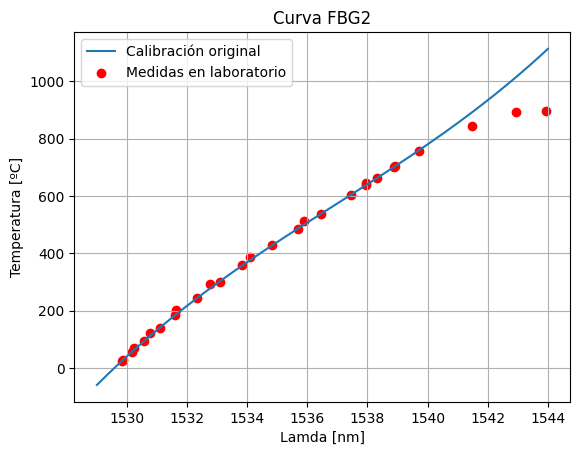

In [14]:
# Dibujar la funcion de calibración del fabricante
intervalo_lamda = np.linspace(1529, 1544, 1000)  # Ajusta el rango según tus necesidades
temperatura_original = calib_FBG2(intervalo_lamda)
plt.plot(intervalo_lamda, temperatura_original, label='Calibración original')

# Graficar los valores medios_loc vs valores_medios_temp para cada subcarpeta
plt.scatter(valores_medios_loc, valores_medios_temp, label="Medidas en laboratorio",color='red')

plt.legend()
plt.grid(True)

plt.title('Curva FBG2')
plt.xlabel('Lamda [nm]')
plt.ylabel('Temperatura [ºC]')
plt.show()


# Representación y comparación usando temperaturas dadas por termopar
Representamos ahora las temperaturas que daba el termopar con sus lamdas asociadas de la FB2

[21.2, 26.7, 58.1, 67.6, 100.9, 123.4, 150.7, 198.5, 203.5, 256.9, 294.3, 313.2, 369.1, 388.9, 438, 495.1, 510.9, 547, 611.2, 642, 644.6, 664, 701.5, 705.1, 753, 860, 942, 994.3]
[21.2, 28, 58.8, 67.7, 101.5, 123.6, 151.6, 198.7, 203.9, 257.2, 294.7, 313.6, 369.5, 390, 438.8, 496.5, 513.2, 549.7, 614.5, 646.5, 648.3, 670, 706.9, 708.5, 759.7, 870.9, 956.4, 1014]


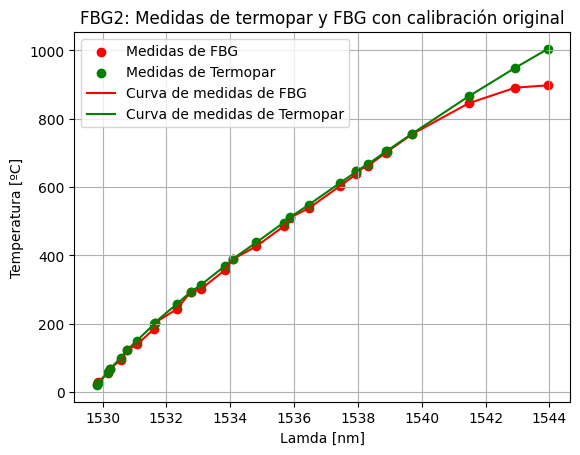

In [47]:
#Calculamos el valor medio de la temperatura dada por el termopar en cada caso

lamdas_sorted = sorted(valores_medios_loc)
temps_sorted_fbg = sorted(valores_medios_temp)
temps_min = sorted([21.2, 58.1, 100.9, 150.7, 198.5, 256.9, 313.2, 369.1, 438, 495.1, 547, 611.2, 642, 664, 701.5, 705.1, 26.7, 67.6, 123.4, 203.5, 294.3, 388.9, 510.9, 644.6, 753, 860, 942, 994.3])
temps_max = sorted([21.2, 58.8, 101.5, 151.6, 198.7, 257.2, 313.6, 369.5, 438.8, 496.5, 549.7, 614.5, 646.5, 670, 706.9, 708.5, 28, 67.7, 123.6, 203.9, 294.7, 390, 513.2, 648.3, 759.7, 870.9, 956.4, 1014])

temps_sorted_termopar = [(a + b)/2 for a, b in zip(temps_min, temps_max)]

plt.scatter(lamdas_sorted, temps_sorted_fbg, label="Medidas de FBG",color='red')
plt.scatter(lamdas_sorted, temps_sorted_termopar, label="Medidas de Termopar",color='Green')

plt.plot(lamdas_sorted, temps_sorted_fbg, label="Curva de medidas de FBG",color='red')
plt.plot(lamdas_sorted, temps_sorted_termopar, label="Curva de medidas de Termopar",color='Green')


plt.legend()
plt.grid(True)

plt.title('FBG2: Medidas de termopar y FBG con calibración original')
plt.xlabel('Lamda [nm]')
plt.ylabel('Temperatura [ºC]')
plt.show()

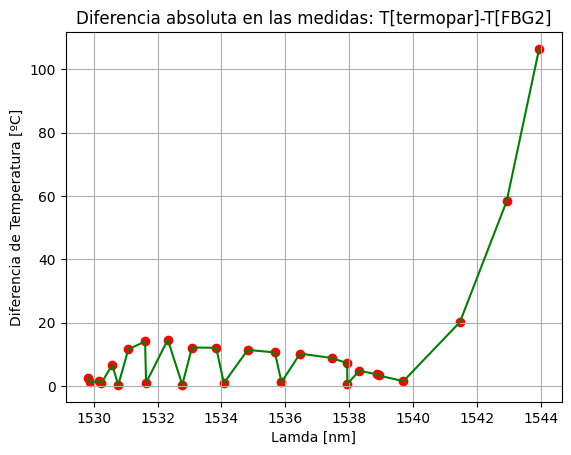

In [48]:
diferencia_temps = [abs(a - b) for a, b in zip(temps_sorted_termopar, temps_sorted_fbg)]

plt.plot(lamdas_sorted, diferencia_temps,color='Green')
plt.scatter(lamdas_sorted, diferencia_temps,color='Red')


plt.grid(True)

plt.title('Diferencia absoluta en las medidas: T[termopar]-T[FBG2]')
plt.xlabel('Lamda [nm]')
plt.ylabel('Diferencia de Temperatura [ºC]')
plt.show()

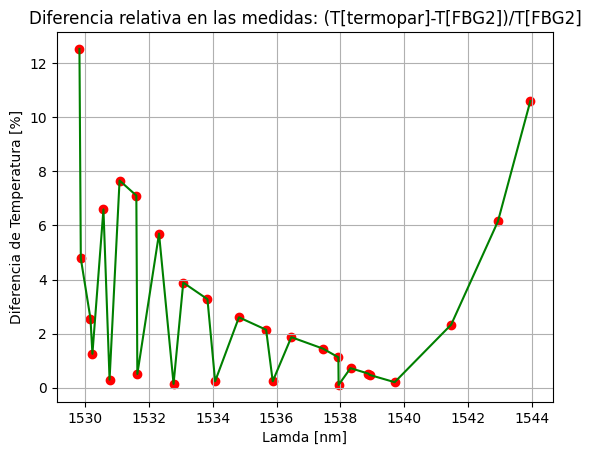

In [50]:
diferencia_rel_temps = [100*abs(a - b)/a for a, b in zip(temps_sorted_termopar, temps_sorted_fbg)]

plt.plot(lamdas_sorted, diferencia_rel_temps,color='Green')
plt.scatter(lamdas_sorted, diferencia_rel_temps,color='Red')


plt.grid(True)

plt.title('Diferencia relativa en las medidas: (T[termopar]-T[FBG2])/T[FBG2]')
plt.xlabel('Lamda [nm]')
plt.ylabel('Diferencia de Temperatura [%]')
plt.show()

In [19]:
print(lamdas_sorted)

[1529.8250539999997, 1529.8677779999996, 1530.1709300000002, 1530.2311739999996, 1530.576526, 1530.7684139999994, 1531.0819060000006, 1531.6074640000006, 1531.6391079999999, 1532.31783, 1532.7734160000005, 1533.0774339999996, 1533.8352100000006, 1534.076128, 1534.822126, 1535.6739179999995, 1535.8804400000001, 1536.4630980000004, 1537.4516219999996, 1537.9369219999999, 1537.9444839999999, 1538.3172060000004, 1538.8783119999998, 1538.9208079999996, 1539.7011039999995, 1541.4714080000006, 1542.9352179999994, 1543.95197]


# Interpolamos con los valores dados por el termopar

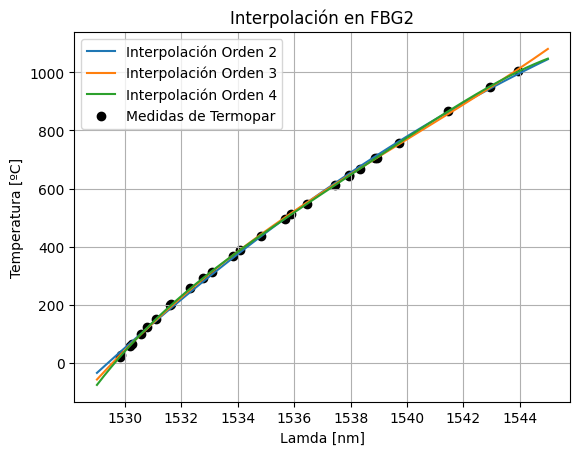

In [21]:
# lamdas_sorted es la referencia en X y temps_sorted_termopar es la referencia en Y
lamda_ref = 1529.851

from scipy.interpolate import InterpolatedUnivariateSpline

interp2 = np.poly1d(np.polyfit([(a - lamda_ref)/lamda_ref for a in lamdas_sorted],temps_sorted_termopar,2))
interp3 = np.poly1d(np.polyfit([(a - lamda_ref)/lamda_ref for a in lamdas_sorted],temps_sorted_termopar,3))
interp4 = np.poly1d(np.polyfit([(a - lamda_ref)/lamda_ref for a in lamdas_sorted],temps_sorted_termopar,4))


lamdas_plot = np.linspace(1529,1545,500)
temps_interp2 = interp2([(a - lamda_ref)/lamda_ref for a in lamdas_plot])
temps_interp3 = interp3([(a - lamda_ref)/lamda_ref for a in lamdas_plot])
temps_interp4 = interp4([(a - lamda_ref)/lamda_ref for a in lamdas_plot])

plt.plot(lamdas_plot,temps_interp2,label="Interpolación Orden 2")
plt.plot(lamdas_plot,temps_interp3,label="Interpolación Orden 3")
plt.plot(lamdas_plot,temps_interp4,label="Interpolación Orden 4")

plt.scatter(lamdas_sorted, temps_sorted_termopar, label="Medidas de Termopar",color='black')
plt.legend()
plt.grid(True)
plt.title('Interpolación en FBG2')
plt.xlabel('Lamda [nm]')
plt.ylabel('Temperatura [ºC]')
plt.show()

In [22]:
print("Modelo de orden 2:")
print(interp2)
print("------------------------------------------------------")
print("Modelo de orden 3:")
print(interp3)
print("------------------------------------------------------")
print("Modelo de orden 4:")
print(interp4)
print("------------------------------------------------------")
print("Siendo X la longitud de onda")

Modelo de orden 2:
            2
-3.049e+06 x + 1.316e+05 x + 40.9
------------------------------------------------------
Modelo de orden 3:
         3             2
4.4e+08 x - 8.921e+06 x + 1.512e+05 x + 30.84
------------------------------------------------------
Modelo de orden 4:
            4             3             2
-1.088e+11 x + 2.349e+09 x - 1.924e+07 x + 1.69e+05 x + 25.77
------------------------------------------------------
Siendo X la longitud de onda


In [23]:
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    result = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return result

R2 = adjR(lamdas_sorted,temps_sorted_termopar,2)
R3 = adjR(lamdas_sorted,temps_sorted_termopar,3)
R4 = adjR(lamdas_sorted,temps_sorted_termopar,4)

print("R-Cuadrado para polinomio Orden 2 = ",R2)
print("R-Cuadrado para polinomio Orden 3 = ",R3)
print("R-Cuadrado para polinomio Orden 4 = ",R4)

R-Cuadrado para polinomio Orden 2 =  0.9990675892262448
R-Cuadrado para polinomio Orden 3 =  0.9997551399334362
R-Cuadrado para polinomio Orden 4 =  0.9999664459881543


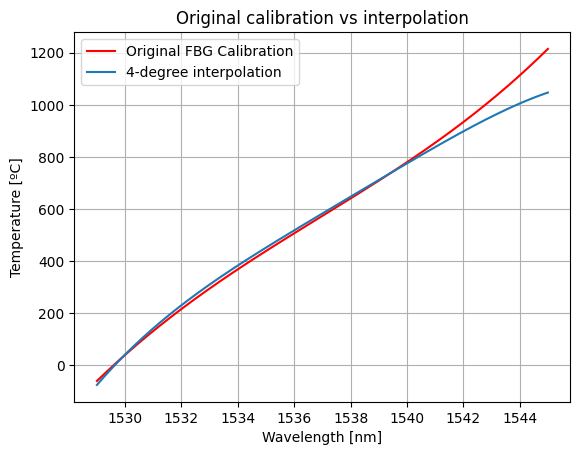

In [24]:
calibracion_original = calib_FBG2(lamdas_plot)
plt.plot(lamdas_plot, calibracion_original, label="Original FBG Calibration",color='red')
#plt.plot(lamdas_plot,temps_interp2,label="Interpolación Orden 2")
#plt.plot(lamdas_plot,temps_interp3,label="Interpolación Orden 3")
plt.plot(lamdas_plot,temps_interp4,label="4-degree interpolation")
plt.legend()
plt.grid(True)
plt.title('Original calibration vs interpolation')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Temperature [ºC]')
plt.show()

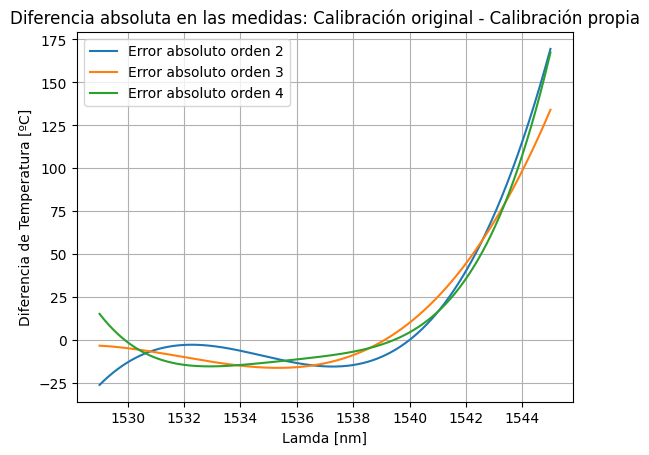

In [25]:
# Calculamos la diferencia entre la calibración original y nuestra interpolación

diferencia_curvas2 = [(a - b) for a, b in zip(calibracion_original, temps_interp2)]
plt.plot(lamdas_plot, diferencia_curvas2,label="Error absoluto orden 2")
diferencia_curvas3 = [(a - b) for a, b in zip(calibracion_original, temps_interp3)]
plt.plot(lamdas_plot, diferencia_curvas3,label="Error absoluto orden 3")
diferencia_curvas4 = [(a - b) for a, b in zip(calibracion_original, temps_interp4)]
plt.plot(lamdas_plot, diferencia_curvas4,label="Error absoluto orden 4")

plt.grid(True)
plt.legend()

plt.title('Diferencia absoluta en las medidas: Calibración original - Calibración propia')
plt.xlabel('Lamda [nm]')
plt.ylabel('Diferencia de Temperatura [ºC]')
plt.show()

In [26]:
#Comparar medidas de FBG original, minimos cuadrados y termopar con gráfico de barras
#print(lamdas_sorted)
#print(temps_sorted_fbg)
#print(temps_sorted_termopar)

temps_sorted_cal2 = interp2([(a - lamda_ref)/lamda_ref for a in lamdas_sorted])
temps_sorted_cal3 = interp3([(a - lamda_ref)/lamda_ref for a in lamdas_sorted])
temps_sorted_cal4 = interp4([(a - lamda_ref)/lamda_ref for a in lamdas_sorted])

#Obtenemos la diferencia de original y nuevas interpolaciones con la FBG
diff_fbg = [abs(a - b) for a, b in zip(temps_sorted_termopar, temps_sorted_fbg)]
diff_c2 = [abs(a - b) for a, b in zip(temps_sorted_termopar, temps_sorted_cal2)]
diff_c3 = [abs(a - b) for a, b in zip(temps_sorted_termopar, temps_sorted_cal3)]
diff_c4 = [abs(a - b) for a, b in zip(temps_sorted_termopar, temps_sorted_cal4)]

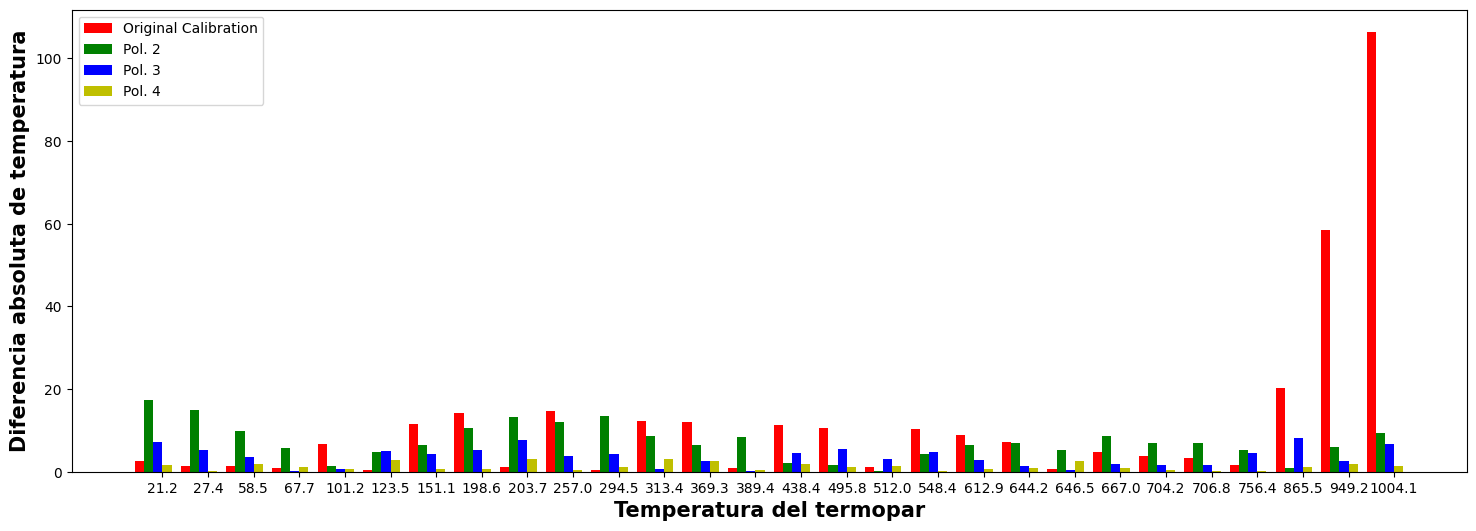

In [46]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(18, 6))


# Set position of bar on X axis
br1 = np.arange(len(temps_sorted_termopar))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

posiciones = np.arange(len(temps_sorted_termopar))

# Make the plot
plt.bar(posiciones-1.5*barWidth, diff_fbg, color ='r', width = barWidth,
        label ='Original Calibration')
plt.bar(posiciones-0.5*barWidth, diff_c2, color ='g', width = barWidth,
        label ='Pol. 2')
plt.bar(posiciones+0.5*barWidth, diff_c3, color ='b', width = barWidth,
        label ='Pol. 3')
plt.bar(posiciones+1.5*barWidth, diff_c4, color ='y', width = barWidth,
        label ='Pol. 4')

# Adding Xticks
plt.xlabel('Temperatura del termopar', fontweight ='bold', fontsize = 15)
plt.ylabel('Diferencia absoluta de temperatura', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(temps_sorted_termopar))],[round(numero, 1) for numero in temps_sorted_termopar])



plt.legend()
plt.show()

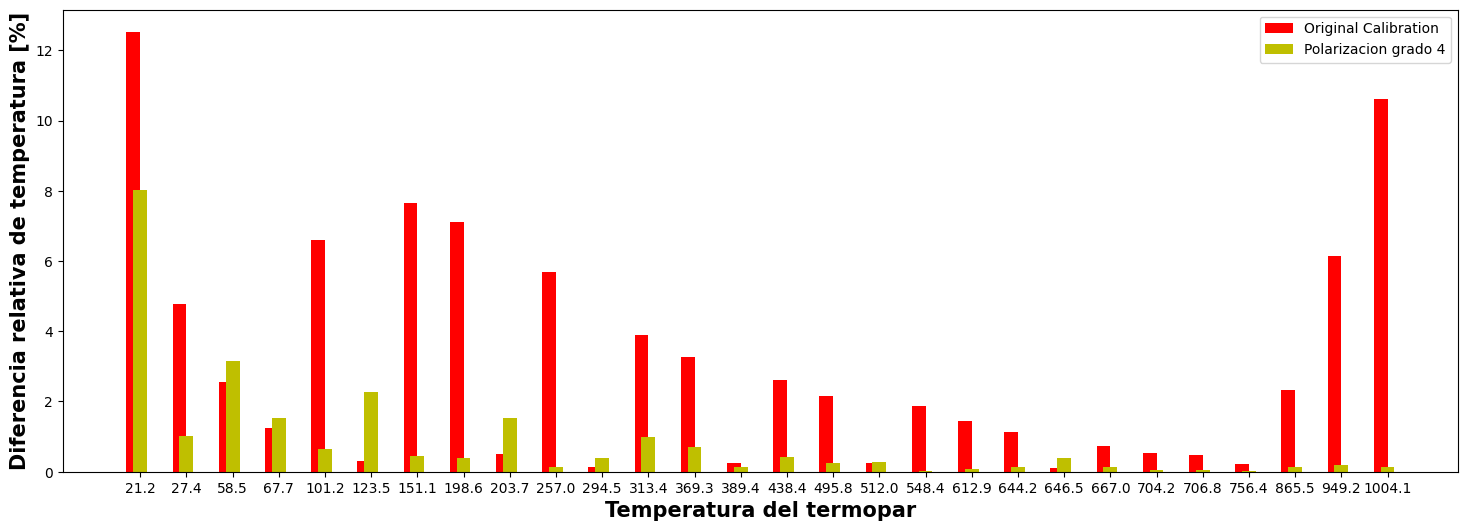

In [45]:
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(18, 6))


# Set position of bar on X axis
br1 = np.arange(len(temps_sorted_termopar))
br2 = [x + barWidth for x in br1]

posiciones = np.arange(len(temps_sorted_termopar))

# Make the plot
plt.bar(posiciones+0.5*barWidth, [100*a/b for a, b in zip(diff_fbg,temps_sorted_termopar)], color ='r', width = barWidth,
        label ='Original Calibration')

plt.bar(posiciones+1*barWidth, [100*a/b for a, b in zip(diff_c4,temps_sorted_termopar)], color ='y', width = barWidth,
        label ='Polarizacion grado 4')

# Adding Xticks
plt.xlabel('Temperatura del termopar', fontweight ='bold', fontsize = 15)
plt.ylabel('Diferencia relativa de temperatura [%]', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(temps_sorted_termopar))],[round(numero, 1) for numero in temps_sorted_termopar])



plt.legend()
plt.show()